# Water potability classification task

Kaggle dataset: a 'water_potability.csv' file contains water quality metrics for 3276 different water bodies. I will analyze this dataset and find out what the important features influencing safe, potable water are. 

Parameters: 
    - pH value: indicator of acidity. Values in this dataset between 6.52--6.83
    - Hardness: caused by calcium and magnesium salts.
    - Solids (Total dissolved solids TDS): desired limit is 500mg/l, maximum for drinking water use is 1000mg/l
    - Chloramines: major desinfectants used in water. Up to 4mg/l is considered to be safe.
    - Sulfate: substances found in minerals, soil and rocks. Ranges from 3--30mg/l
    - Conductivity: increased ions concentrations increase Conductivity. It should not exceed 400microS/cm
    - Organic Carbon: TOC is a measure of the total amount of carbon in organic compounds in pure water.
    - Thrialomethanes: chemicals found in water treated with chlorines. Levels up to 80ppm is safe.
    - Turbidity: depends on the quantity of solid matter.
    - Potability: indicates whether the water is safe for water consumption. 1 means potable and 0 not potable.

In [31]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## Pre-processing

In [32]:
#Read dataset
path = glob.glob('*.csv')
df = pd.read_csv(path[0],na_values = ['NULL'])
df[df<0] = float('NaN') #as these values cannot be negative
print('Shape of the file: {}'.format(df.shape))

Shape of the file: (3276, 10)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
ph                 2785 non-null float64
Hardness           3276 non-null float64
Solids             3276 non-null float64
Chloramines        3276 non-null float64
Sulfate            2495 non-null float64
Conductivity       3276 non-null float64
Organic_carbon     3276 non-null float64
Trihalomethanes    3114 non-null float64
Turbidity          3276 non-null float64
Potability         3276 non-null int64
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [34]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [35]:
df.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['count'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785,7.08079,1.59432,0,6.09309,7.03675,8.06207,14
Hardness,3276,196.369,32.8798,47.432,176.851,196.968,216.667,323.124
Solids,3276,22014.1,8768.57,320.943,15666.7,20927.8,27332.8,61227.2
Chloramines,3276,7.12228,1.58308,0.352,6.12742,7.1303,8.11489,13.127
Sulfate,2495,333.776,41.4168,129,307.699,333.074,359.95,481.031
Conductivity,3276,426.205,80.8241,181.484,365.734,421.885,481.792,753.343
Organic_carbon,3276,14.285,3.30816,2.2,12.0658,14.2183,16.5577,28.3
Trihalomethanes,3114,66.3963,16.175,0.738,55.8445,66.6225,77.3375,124
Turbidity,3276,3.96679,0.780382,1.45,3.43971,3.95503,4.50032,6.739
Potability,3276,0.39011,0.487849,0,0,0,1,1


In [36]:
#Missing Values
df.isna().values.any()

True

In [37]:
print('ph, Sulfate and Trihalomethanes are the 3 features with missing values')
df.isna().sum()

ph, Sulfate and Trihalomethanes are the 3 features with missing values


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [38]:
# We could simply Drop them, But that would cause that about of 1/3 would be lost. 
# We will try to preserve the rows and change them for median values
print('Statistics on the different non-potable waters')
df[df['Potability'] == 0].describe()

Statistics on the different non-potable waters


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [39]:
print('Statistics on the different potable waters')
df[df.Potability == 1].describe()

Statistics on the different potable waters


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


Statistics seem very similar. We can probably change missing values for the median values of ph, Sulfate and Trihalomethanes


In [40]:
ph_med_pot, sulf_med_pot, tri_med_pot = df[df.Potability ==1][['ph', 'Sulfate','Trihalomethanes']].median().values
ph_med_nonpot, sulf_med_nonpot, tri_med_nonpot = df[df.Potability ==0][['ph', 'Sulfate','Trihalomethanes']].median().values

In [41]:
df['ph'].fillna(value = (ph_med_pot + ph_med_nonpot)/2., inplace = True)
df['Sulfate'].fillna(value = (sulf_med_pot + sulf_med_nonpot)/2., inplace =True)
df['Trihalomethanes'].fillna(value = (tri_med_pot + tri_med_nonpot)/2., inplace = True)
#df.dropna(inplace= True)

In [42]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [43]:
df = df[df.ph !=0]
df[df > 0 ].count()

ph                 3275
Hardness           3275
Solids             3275
Chloramines        3275
Sulfate            3275
Conductivity       3275
Organic_carbon     3275
Trihalomethanes    3275
Turbidity          3275
Potability         1278
dtype: int64

Visualization of the dataset

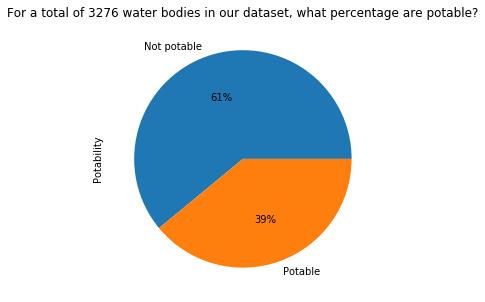

In [44]:
p = df.Potability.value_counts()
p.index = ['Not potable', 'Potable']
plot = p.plot.pie(figsize=(5, 5), legend = False, shadow = False, autopct='%1.0f%%', \
    title = 'For a total of 3276 water bodies in our dataset, what percentage are potable?')

In [54]:
#Histograms of the features
import plotly.express as px
def histo_feature(df, feat):
    fig = px.histogram(df, x=df[feat], nbins = 50, color = df['Potability'], template = 'plotly_white',\
        marginal= 'violin', opacity = 0.75, barmode = 'group', histnorm = 'percent')

    fig.update_layout(
        font_size = 20,
        font_family='monospace',
        title=dict(text=feat + ' distribution of the water bodies',x=0.53,y=0.95,
                font=dict(size=20)),
        legend=dict(x=1,y=0.96,borderwidth=0,tracegroupgap=5))
    fig.show()
    fig.write_image(feature+".pdf")
    
for feature in df.columns[:-1]:
    histo_feature(df, feature)

In some features there is a high peak around the median because we changed all the missing values to the median of the distribution

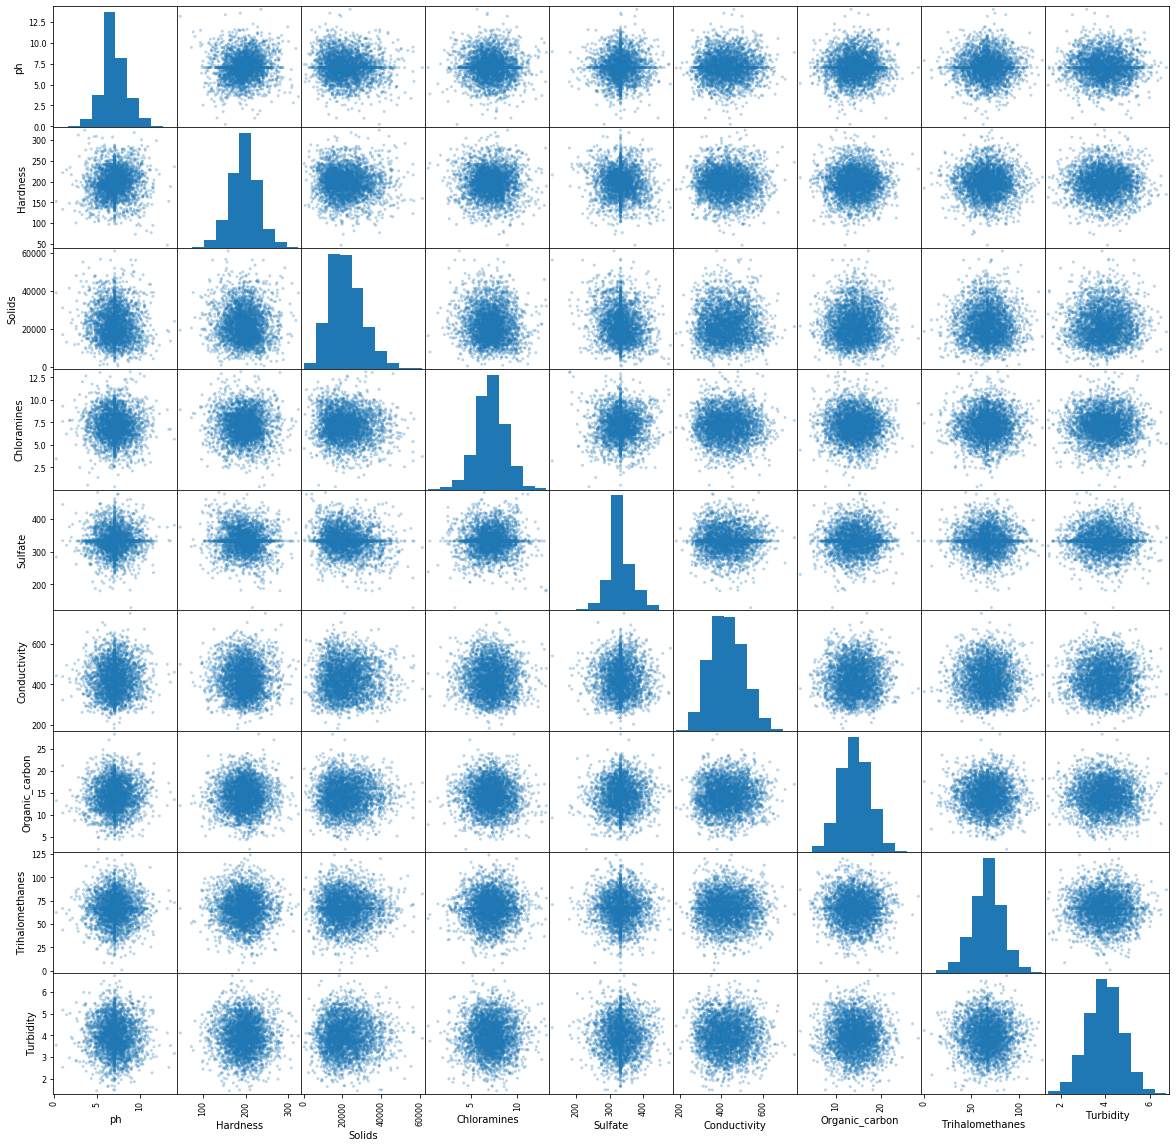

In [55]:
#Scatter plot matrix
df_scat_mat = df.drop(columns=['Potability'])
pd.plotting.scatter_matrix(df_scat_mat, alpha = 0.3, figsize = (20,20))
plt.show()

There seems not to be important correlations if we do not consider the updated NaN values with the median of the column

In [56]:
#Correlation matrix with Pearson's correlation coefficient between -1 and 1
correlation = df_scat_mat.corr()
correlation

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.076861,-0.077798,-0.031131,0.014205,0.020413,0.037473,0.004216,-0.034423
Hardness,0.076861,1.000000,-0.047510,-0.030141,-0.092874,-0.024264,0.003954,-0.012831,-0.014665
Solids,-0.077798,-0.047510,1.000000,-0.070724,-0.149882,0.011996,0.012170,-0.009503,0.018400
Chloramines,-0.031131,-0.030141,-0.070724,1.000000,0.023746,-0.020790,-0.012364,0.016509,0.002180
Sulfate,0.014205,-0.092874,-0.149882,0.023746,1.000000,-0.014256,0.027229,-0.025714,-0.009745
Conductivity,0.020413,-0.024264,0.011996,-0.020790,-0.014256,1.000000,0.022175,0.000762,0.005070
Organic_carbon,0.037473,0.003954,0.012170,-0.012364,0.027229,0.022175,1.000000,-0.012532,-0.026581
Trihalomethanes,0.004216,-0.012831,-0.009503,0.016509,-0.025714,0.000762,-0.012532,1.000000,-0.021764
Turbidity,-0.034423,-0.014665,0.018400,0.002180,-0.009745,0.005070,-0.026581,-0.021764,1.000000


In [57]:
px.imshow(correlation, template = 'plotly_white', color_continuous_scale='greens')

We have seen that in our dataset there seems to be no correlations between the features, and that there is a 3 to 2 ratio between the number of not potable and potable water bodies. Also, the distribution of some features seem to be asymmetric, i.e., they are skewed. Skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. This means that when training the model, it will have a higher number of samples close to the peak (mode) of the distribution, and therefore it will underperform at values closer to the tail. Moreover, skewness tells us about the direction of outliers. If the distribution is positively skewed (leans to the left), most of the outliers are present on the right side of the distribution. As the presence of skeweness can affect the predicting capabilities of the machine learning model, before modelling the dataset with deep learning, we correct for the skeweness.

In [58]:
#Skeweness
#We can objectively determine if the variable is skewed using the Shapiro-Wilks test. The null hypothesis for this test is that the data is a sample from a normal distribution, so a p-value less than 0.05 indicates significant skewness.
from scipy.stats import shapiro
p_val_sk_list = [(i,shapiro(df[i])[1]) for i in df.columns][:-1]
print(p_val_sk_list)

[('ph', 9.39252195664669e-21), ('Hardness', 9.762395336565532e-08), ('Solids', 3.9140819395397213e-22), ('Chloramines', 1.8709721416598768e-06), ('Sulfate', 1.818417312654249e-29), ('Conductivity', 1.5829330901606653e-11), ('Organic_carbon', 0.6261143684387207), ('Trihalomethanes', 3.9922151700011455e-06), ('Turbidity', 0.938860297203064)]


In [59]:
#A more convenient way of evaluating skewness is with pandas’ “.skew” method via the Fisher-Pearson coefficient. 
# Here, normal distribution returns 0 skeweness. A negative skewness value indicates an asymmetry corresponding to a tail that is larger towards the left hand side of the distribution.
features = df.dtypes[df.dtypes != 'object'].index[:-1]
skew_feat = df[features].skew()
print('Skeweness of the water features distributions prior to transformation: \t ')
print(skew_feat)

Skeweness of the water features distributions prior to transformation: 	 
ph                 0.071882
Hardness          -0.038881
Solids             0.617805
Chloramines       -0.011685
Sulfate           -0.018194
Conductivity       0.264440
Organic_carbon     0.026162
Trihalomethanes   -0.086636
Turbidity         -0.007264
dtype: float64


In [60]:
#We can address skewed variables by applying the same function to each value. Common transformations include square root (sqrt(x)), logarithmic (log(x)), and reciprocal (1/x).

#We will only transform Conductivity, 
df_sk_sqrt = df.copy()
df_sk_sqrt[features] = df[features]**(0.5)
skew_feat_sqrt = df_sk_sqrt[features].skew()
print("------------------")
print('Skeweness of the water features distributions after SQRT(x) transformation')
print(skew_feat_sqrt)
print("------------------")

df_sk_log = df.copy()
df_sk_log[features] = np.log(df[features])
skew_feat_log = df_sk_log[features].skew()
print("------------------")
print('Skeweness of the water features distributions after log(x) transformation')
print(skew_feat_log)
print("------------------")

df_sk_rec = df.copy()
df_sk_rec[features] = 1./df[features]
skew_feat_rec = df_sk_rec[features].skew()
print("------------------")
print('Skeweness of the water features distributions after Reciprocal(x) transformation')
print(skew_feat_rec)
print("------------------")

from scipy.stats import boxcox
df_sk_boxcox = df.copy()
for i in features:
    df_sk_boxcox[i], l = boxcox(df[i],lmbda= None)
skew_feat_boxcox = df_sk_boxcox[features].skew()
print("------------------")
print('Skeweness of the water features distributions after boxcox(x) transformation')
print(skew_feat_boxcox)
print("------------------")

------------------
Skeweness of the water features distributions after SQRT(x) transformation
ph                -0.597747
Hardness          -0.405248
Solids            -0.018095
Chloramines       -0.575220
Sulfate           -0.359635
Conductivity       0.031722
Organic_carbon    -0.376268
Trihalomethanes   -0.669434
Turbidity         -0.318586
dtype: float64
------------------
------------------
Skeweness of the water features distributions after log(x) transformation
ph                -2.149186
Hardness          -0.852114
Solids            -1.138404
Chloramines       -1.730154
Sulfate           -0.758670
Conductivity      -0.208483
Organic_carbon    -0.886764
Trihalomethanes   -2.416915
Turbidity         -0.670015
dtype: float64
------------------
------------------
Skeweness of the water features distributions after Reciprocal(x) transformation
ph                 37.041379
Hardness            2.586032
Solids             30.142770
Chloramines        22.288753
Sulfate             1.937

In [61]:
print("A boxcox transformation clearly performs the best. Let's plot the corrected distributions")
for feature in df.columns[:-1]:
    histo_feature(df_sk_boxcox, feature)

A boxcox transformation clearly performs the best. Let's plot the corrected distributions


From now on we will work with the skewed-corrected dataset via boxcox transformation "df_sk_boxcox". We will apply the machine learning model to it.

## Model

In [64]:
data = np.asarray(df_sk_boxcox.iloc[:, :-1].values).astype('float32') #All columns but the Potability
labels = np.asarray(df_sk_boxcox['Potability'].values).astype('float32') #0 means not potable, 1 is potable

print('Shape of the dataset: {}'.format(data.shape))
print('Shape of the labels: {}'.format(labels.shape))

Shape of the dataset: (3275, 9)
Shape of the labels: (3275,)


In [69]:
#Shuffle and split the data
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2) 
print('Shape of the training + validation set: {}'.format(x_train.shape))
print('Shape of the test set: {}'.format(x_test.shape))

Shape of the training + validation set: (2620, 9)
Shape of the test set: (655, 9)


We normalize the features in the data so they all are centered in 0 and have unit std dev


In [70]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

Build the network

In [87]:
import keras
from keras import models
from keras import layers
from keras import regularizers

hid_un = 64
hid_un_final =1

model = models.Sequential()
#Activation functions are non-linear functions ncessary to get access to get access to a richer hypothesis space
model.add(layers.Dense(hid_un, activation = 'relu', input_shape = (x_train.shape[1],), kernel_regularizer = regularizers.l2(0.01) ) ) 
model.add(layers.Dropout(0.3))
model.add(layers.Dense(hid_un_final, activation = 'sigmoid'))  #activation func. 'sigmoid' so as to output a probability between 0 and 1

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [88]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LambdaCallback

checkpointer = ModelCheckpoint(filepath='potable_weights.model.hdf5', save_best_only=True, verbose = 2 )
early_stop = EarlyStopping(monitor='val_loss', patience = 15)
history = model.fit(x_train, y_train, epochs = 120, batch_size = 128, validation_split = 0.2)

Epoch 1/120
17/17 [==============================] - 0s 7ms/step - loss: 0.8620 - accuracy: 0.5415 - val_loss: 0.8317 - val_accuracy: 0.5744
Epoch 2/120
17/17 [==============================] - 0s 2ms/step - loss: 0.8389 - accuracy: 0.5496 - val_loss: 0.8041 - val_accuracy: 0.6031
Epoch 3/120
17/17 [==============================] - 0s 2ms/step - loss: 0.8109 - accuracy: 0.5940 - val_loss: 0.7836 - val_accuracy: 0.6183
Epoch 4/120
17/17 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.6021 - val_loss: 0.7665 - val_accuracy: 0.6202
Epoch 5/120
17/17 [==============================] - 0s 2ms/step - loss: 0.7688 - accuracy: 0.6245 - val_loss: 0.7530 - val_accuracy: 0.6298
Epoch 6/120
17/17 [==============================] - 0s 2ms/step - loss: 0.7588 - accuracy: 0.6202 - val_loss: 0.7404 - val_accuracy: 0.6355
Epoch 7/120
17/17 [==============================] - 0s 2ms/step - loss: 0.7426 - accuracy: 0.6274 - val_loss: 0.7294 - val_accuracy: 0.6355
Epoch 8/120
1

Fit keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


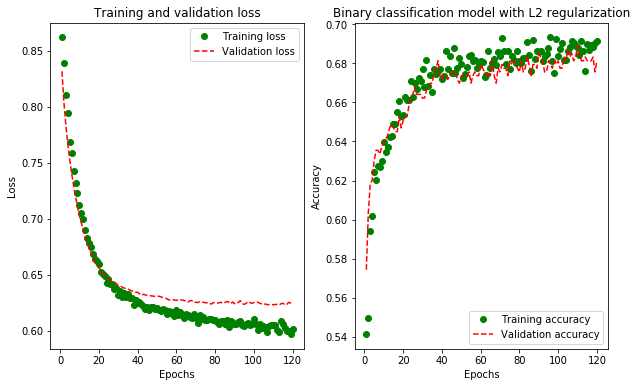

In [89]:
def plot_fit_res(history):

    #history object has a member history which is a dictionary containing fit info
    history_dict = history.history
    print(f'Fit keys: { history_dict.keys()}') 

    fig, (ax1,ax2) = plt.subplots(1,2, figsize =(10, 6))

    #loss
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = np.arange(1, len(loss_values) + 1)

    ax1.plot(epochs, loss_values, 'go', label = 'Training loss')
    ax1.plot(epochs, val_loss_values, 'r--', label = 'Validation loss')
    ax1.set_title('Training and validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    #accuracy
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']

    ax2.plot(epochs, acc_values, 'go', label = 'Training accuracy')
    ax2.plot(epochs, val_acc_values, 'r--', label = 'Validation accuracy')
    ax2.set_title('Training and validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.title('Binary classification model with L2 regularization')
    plt.show()

plot_fit_res(history)

In [90]:
final_results = model.evaluate(x_test, y_test)
print(f'Results on the test data: Loss is {final_results[0]} and Accuracy: {final_results[1]}')

21/21 [==============================] - 0s 695us/step - loss: 0.6272 - accuracy: 0.6595
Results on the test data: Loss is 0.6272133588790894 and Accuracy: 0.6595419645309448
